In [1]:
#requirements
!pip install torch
!pip install opencv-python
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.0 MB/s eta 0:00:00


In [2]:
#temporary logic for OCR on number panel

from google.colab.patches import cv2_imshow
import easyocr
import re
import numpy as np
reader=easyocr.Reader(['en'],gpu=True)

def ocr_image(img,coordinates):
  x,y,w,h=int(coordinates[0]),int(coordinates[1]),int(coordinates[2]),int(coordinates[3])
  img=img[y:h,x:w]
  cv2_imshow(img)
  gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  pattern = re.compile(r'^\d+[a-zA-Z]*$')
  #img_75= cv2.resize(gray,(350, 200))
  (thresh, blackAndWhiteImage) = cv2.threshold(gray, 140, 300, cv2.THRESH_BINARY)


  #cv2_imshow(img_75)
  cv2_imshow(blackAndWhiteImage)

  result=reader.readtext(blackAndWhiteImage)
  print(result)
  text=""
  for res in result:
    #print("$$",res)
    if len(result)==1:
      text=res[1]
      print(text)
    if len(result)>1 and res[2]>0.2 and pattern.match(res[1]):
      text=res[1]
  #print(result)
  print("BUS No: ",text)
  #return gray

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [4]:
#YOLO custom model initialization using torch
import torch
import cv2
# Model
model = torch.hub.load("ultralytics/yolov5",'custom',path='/content/best.pt')  # or yolov5n - yolov5x6, custom
model.conf=0.4
model.iou = 0.2
model.multi_label = False


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-12-27 Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


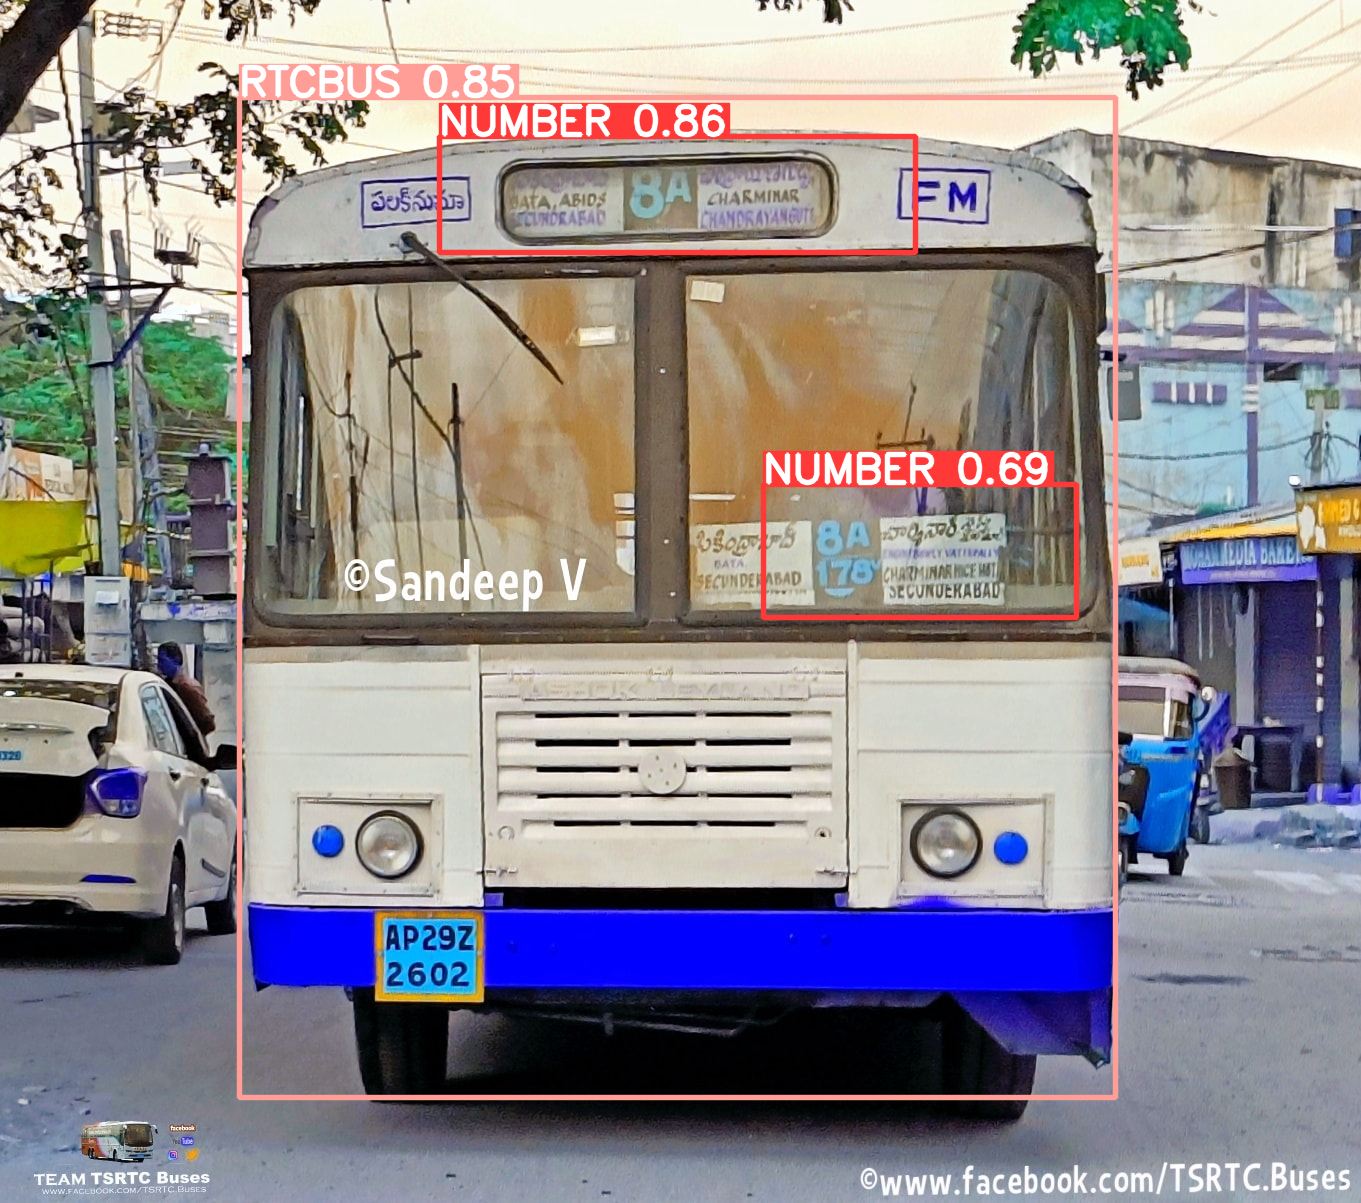

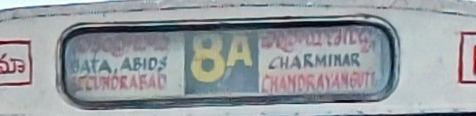

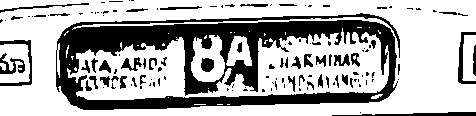

[([[285, 26], [374, 26], [374, 52], [285, 52]], '~tha', 0.0473824068903923), ([[0, 48], [28, 48], [28, 76], [0, 76]], '6u9', 0.3353195608751007), ([[120, 52], [172, 52], [172, 76], [120, 76]], 'AFIDA', 0.4026185236031206), ([[186, 30], [260, 30], [260, 86], [186, 86]], '8A', 0.5759202894453229), ([[275, 47], [364, 47], [364, 73], [275, 73]], 'HaFMiNR', 0.057403356403973024), ([[85, 73], [165, 73], [165, 91], [85, 91]], '(ttcs Fi"', 0.010248051957848796), ([[267, 67], [374, 67], [374, 98], [267, 98]], '4NLA4" "', 0.014696166697423858)]
BUS No:  8A


In [6]:

# Images
img = "/content/test3.jpg"  # or file, Path, PIL, OpenCV, numpy, list

im2 = cv2.imread(img)
#gray=cv2.cvtColor(im2,cv2.COLOR_RGB2GRAY)
# Inference
results = model(im2,size=416)
#results.print()
results.show() # or .show()

#results.xyxy[0]  # im1 predictions (tensor)
tt=results.pandas().xyxy[0]  # im1 predictions (pandas)
#crops = results.crop(save=True)
tt=tt[tt['name']=='NUMBER']

coor=np.array(tt[['xmin','ymin','xmax','ymax']])
imt = cv2.imread(img)
ocr_image(imt,coor[0])
